# MNIST Number Recognition using Deep Learning

Importing the essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels[0]

5

In [ ]:
for i in range(0,5):
  print(train_labels[i])

5
0
4
1
9


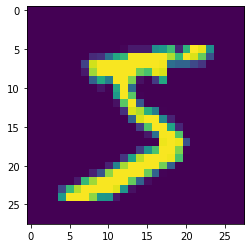

In [ ]:
plt.imshow(train_images[0])
plt.show()

In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:

layers = []
layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
layers.append(tf.keras.layers.Dense(units = 128, activation='relu'))
layers.append(tf.keras.layers.Dense(units = 64, activation = 'relu'))
layers.append(tf.keras.layers.Dense(units = 32, activation = 'relu'))
layers.append(tf.keras.layers.Dense(units = 16, activation = 'relu'))
layers.append(tf.keras.layers.Dense(units = 10))

model = tf.keras.Sequential(layers)


In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1165 - accuracy: 0.9653
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0832 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.024

In [ ]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
preds = prob_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


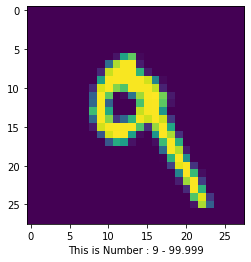

In [ ]:
iden = 7
right = np.argmax(preds[iden])
plt.imshow(test_images[iden])
plt.xlabel("This is Number : {} - {}".format(right, round(100*max(preds[0]),3)))
plt.show()